<h1>Air Pollution Forecasting

Benutzte Python Version: 3.10.11

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

<h3> Supervised Learning Transformation Funtion

In [10]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1 
# as X and t as y


# data: The input time series data, typically a 2D NumPy array or a pandas DataFrame.
# n_in: The number of lag observations (past time steps) to include as input features (default is 1).
# n_out: The number of future time steps to predict (default is 1).
# dropnan: A boolean indicating whether to drop rows with NaN values (default is True).

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

<h3> Datenaufbereitung und Tranformation

In [11]:
df = pd.read_csv("air_pollution_data.csv")
df

date  pollution  dew  temp   press wnd_dir  wnd_spd  \
0      2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79   
1      2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68   
2      2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57   
3      2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36   
4      2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25   
...                    ...        ...  ...   ...     ...     ...      ...   
43795  2014-12-31 19:00:00        8.0  -23  -2.0  1034.0      NW   231.97   
43796  2014-12-31 20:00:00       10.0  -22  -3.0  1034.0      NW   237.78   
43797  2014-12-31 21:00:00       10.0  -22  -3.0  1034.0      NW   242.70   
43798  2014-12-31 22:00:00        8.0  -22  -4.0  1034.0      NW   246.72   
43799  2014-12-31 23:00:00       12.0  -21  -3.0  1034.0      NW   249.85   

       snow  rain  
0         0     0  
1         0     0  
2         0     0  
3         1     0  
4         2     0  
...     ...   ...  
43795     0     0  
43796     0     0  
43797     0     0  
43798     0     0  
43799     0     0  

[43800 rows x 9 columns]

In [12]:
# Checking null values
print(df.isnull().sum())

date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64


In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot for each variable
fig = make_subplots(rows=4, cols=2, subplot_titles=('Pollution', 'Dew', 'Temperature', 'Pressure', 'Wind Direction', 'Wind Speed', 'Snow', 'Rain'))

# Define color palette
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']

# Add a histogram for each variable
fig.add_trace(go.Histogram(x=df['pollution'], nbinsx=20, marker_color=colors[0]), row=1, col=1)
fig.add_trace(go.Histogram(x=df['dew'], nbinsx=20, marker_color=colors[1]), row=1, col=2)
fig.add_trace(go.Histogram(x=df['temp'], nbinsx=20, marker_color=colors[2]), row=2, col=1)
fig.add_trace(go.Histogram(x=df['press'], nbinsx=20, marker_color=colors[3]), row=2, col=2)
fig.add_trace(go.Histogram(x=df['wnd_dir'], nbinsx=20, marker_color=colors[4]), row=3, col=1)
fig.add_trace(go.Histogram(x=df['wnd_spd'], nbinsx=20, marker_color=colors[5]), row=3, col=2)
fig.add_trace(go.Histogram(x=df['snow'], nbinsx=20, marker_color=colors[6]), row=4, col=1)
fig.add_trace(go.Histogram(x=df['rain'], nbinsx=20, marker_color=colors[7]), row=4, col=2)

# Update layout
fig.update_layout(height=1000, width=1200, title_text='Distribution of Variables', showlegend=False)

# Customize axis labels and titles
fig.update_xaxes(title_text='Value', row=1, col=1)
fig.update_xaxes(title_text='Value', row=1, col=2)
fig.update_xaxes(title_text='Value', row=2, col=1)
fig.update_xaxes(title_text='Value', row=2, col=2)
fig.update_xaxes(title_text='Value', row=3, col=1)
fig.update_xaxes(title_text='Value', row=3, col=2)
fig.update_xaxes(title_text='Value', row=4, col=1)
fig.update_xaxes(title_text='Value', row=4, col=2)

fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=3, col=1)
fig.update_yaxes(title_text='Frequency', row=3, col=2)
fig.update_yaxes(title_text='Frequency', row=4, col=1)
fig.update_yaxes(title_text='Frequency', row=4, col=2)

# Customize subplot titles
fig.update_annotations(font_size=16)

# Show the plot
fig.show()

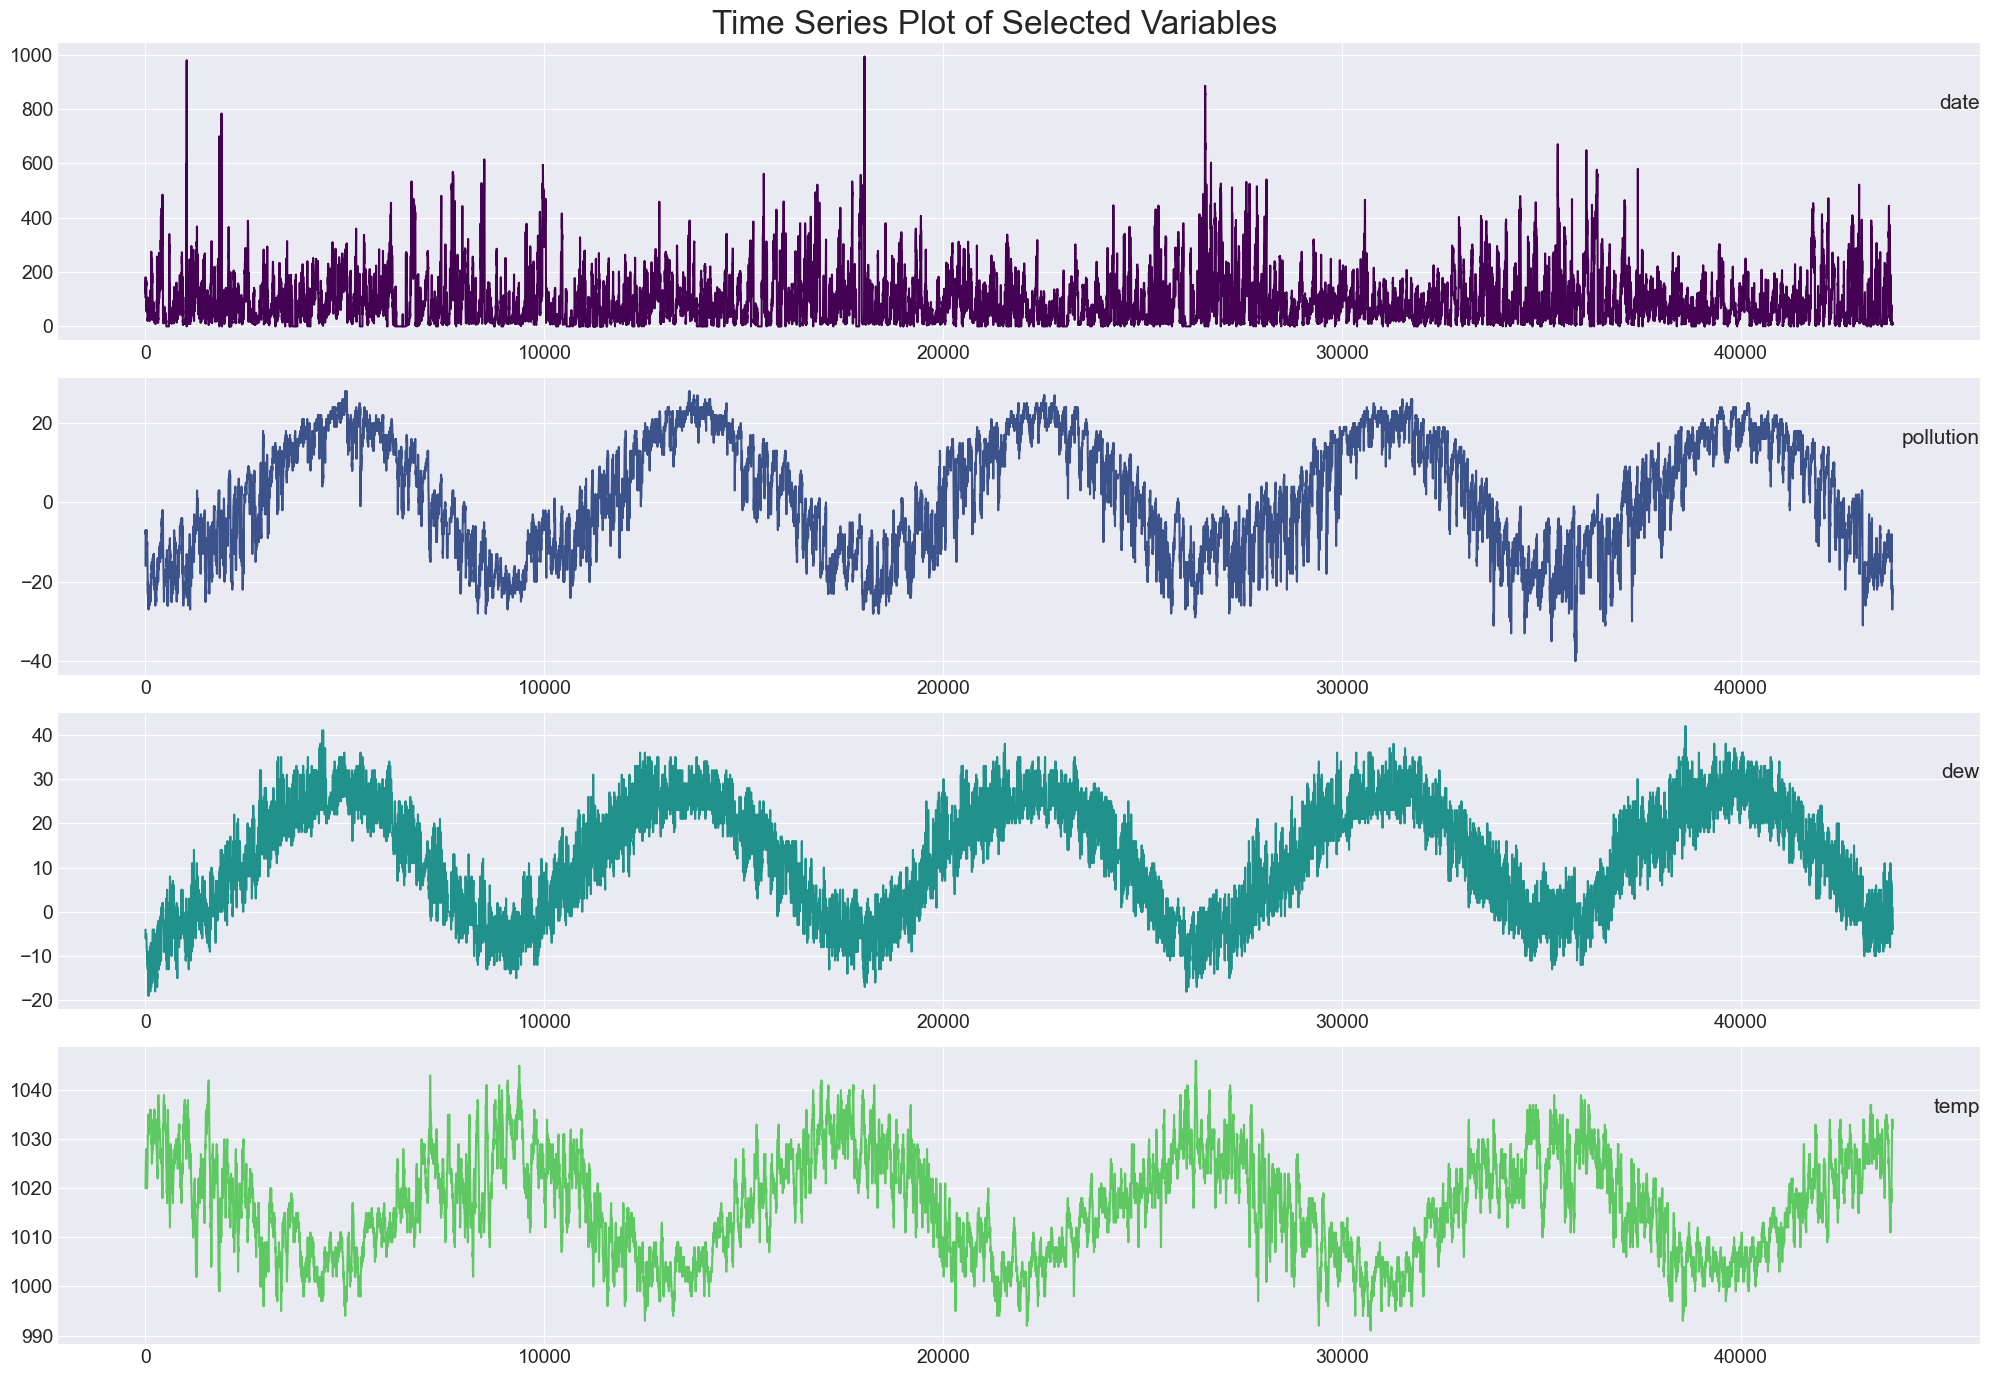

In [14]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

df_vis = pd.read_csv("air_pollution_data.csv").drop(columns=["date"])

values = df_vis.values

# specify columns to plot
groups = [0, 1, 2, 3]
i = 1

# plot each column
fig, axs = plt.subplots(len(groups), 1, figsize=(20, 14), facecolor='white')
for group, ax in zip(groups, axs):
    ax.plot(values[:, group], color=cm.viridis(group/len(groups)))
    ax.set_title(df.columns[group], y=0.75, loc='right', fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)
    i += 1

plt.suptitle('Time Series Plot of Selected Variables', fontsize=24)
plt.tight_layout()
plt.show()

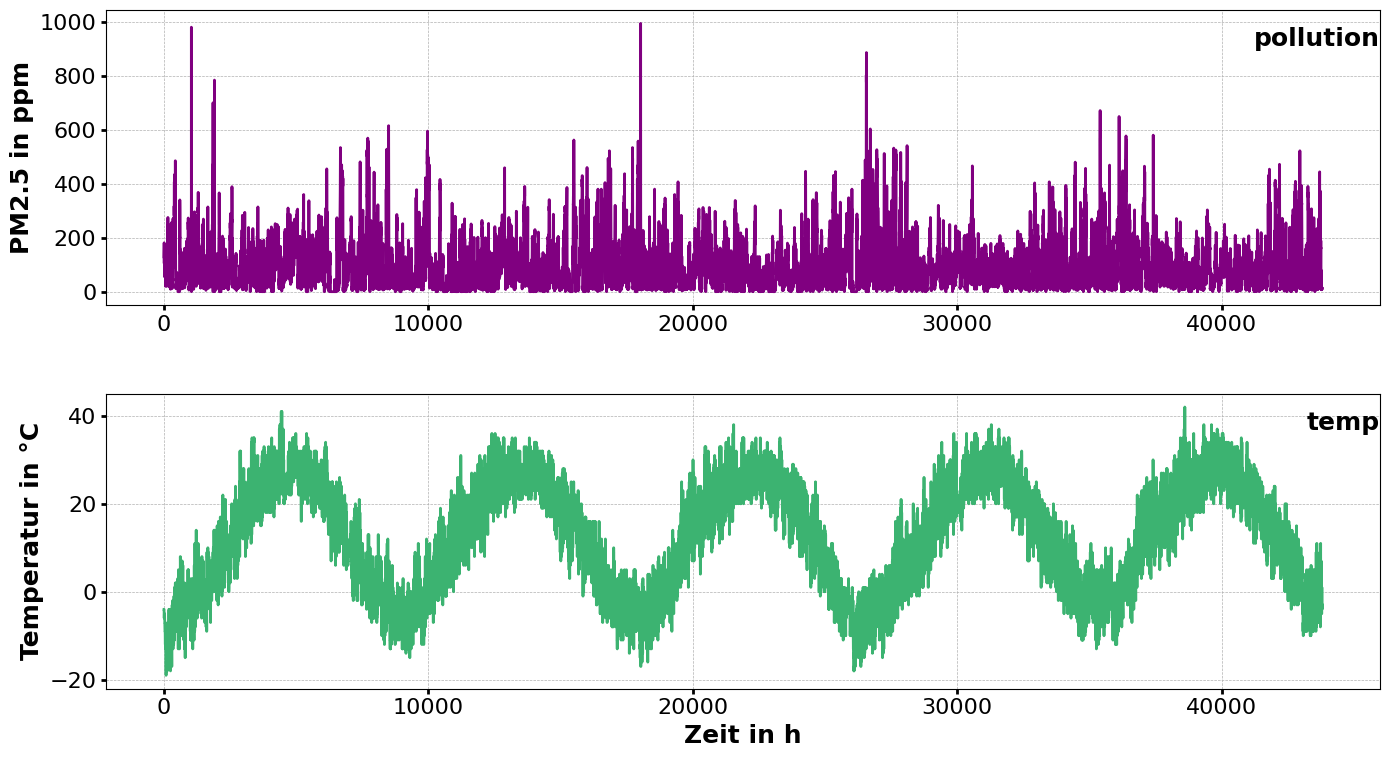

In [1]:
#Antikorrelation zu erkennen und Korrelation Jahreszeiten (Sommer, Winter, usw)

import matplotlib.pyplot as plt
import pandas as pd

# Assuming the CSV file is already read into df_vis
df_vis = pd.read_csv("air_pollution_data.csv").drop(columns=["date"])

values = df_vis.values

# Specify columns to plot
groups = [0, 2]
colors = ['purple', 'mediumseagreen']  # Colors for the lines
i = 1

# Plot each column
fig, axs = plt.subplots(len(groups), 1, figsize=(14, 8), facecolor='white')

for idx, (group, ax, color) in enumerate(zip(groups, axs, colors)):
    ax.plot(values[:, group], color=color, linewidth=2)
    ax.set_title(df_vis.columns[group], y=0.85, loc='right', fontsize=18, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=16, labelcolor='black', width=2)
    ax.set_ylabel('Temperatur in °C', fontsize=18, fontweight='bold')
    ax.grid(True, linestyle='--', linewidth=0.5)
    if idx == 0:
        ax.set_ylabel('PM2.5 in ppm', fontsize=18, fontweight='bold')
    i += 1

# Set xlabel for the last subplot
axs[-1].set_xlabel('Zeit in h', fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.3)

# Show plot
plt.show()


In [16]:
df["wnd_dir"].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [17]:
df = df.copy()

# Define the mapping dictionary
mapping = {'NE': 1, 'SE': 2, 'NW': 3, 'cv': 4}

# Replace the string values with numerical values and handle unmapped values
df['wnd_dir'] = df['wnd_dir'].replace(mapping)

# If you want to keep the original column and create a new one
df['wind_dir'] = df['wnd_dir']

# Verify if there are unmapped values
unmapped_values = df[df['wnd_dir'].isna()]['wnd_dir'].unique()
if len(unmapped_values) > 0:
    print("Unmapped values found:", unmapped_values)

# If you want to delete the original column
del df['wnd_dir']

# Ensure no NaN values remain in 'wind_dir' after the mapping
print(df['wind_dir'].isna().sum())


0


C:\Users\simon\AppData\Local\Temp\ipykernel_11368\3000414634.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [18]:
del df["date"]

In [19]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
# Scaling the entire dataset

dataset = df
#Extracting the data from the dataframe into a numpy array; returns 2D Array
values = dataset.values
#standardize the data type across the dataset
values = values.astype('float32')

#Scales and translates each feature individually in a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [21]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

reframed

(43799, 16)


var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.129779   0.352941   0.245902   0.527273   0.002290   0.000000   
2       0.148893   0.367647   0.245902   0.527273   0.003811   0.000000   
3       0.159960   0.426471   0.229508   0.545454   0.005332   0.000000   
4       0.182093   0.485294   0.229508   0.563637   0.008391   0.037037   
5       0.138833   0.485294   0.229508   0.563637   0.009912   0.074074   
...          ...        ...        ...        ...        ...        ...   
43795   0.010060   0.264706   0.278689   0.763638   0.385730   0.000000   
43796   0.008048   0.250000   0.278689   0.781818   0.395659   0.000000   
43797   0.010060   0.264706   0.262295   0.781818   0.405588   0.000000   
43798   0.010060   0.264706   0.262295   0.781818   0.413996   0.000000   
43799   0.008048   0.264706   0.245902   0.781818   0.420866   0.000000   

       var7(t-1)  var8(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)  \
1            0.0   0.333333  0.148893  0.367647  0.245902  0.527273  0.003811   
2            0.0   0.333333  0.159960  0.426471  0.229508  0.545454  0.005332   
3            0.0   0.333333  0.182093  0.485294  0.229508  0.563637  0.008391   
4            0.0   0.333333  0.138833  0.485294  0.229508  0.563637  0.009912   
5            0.0   0.333333  0.109658  0.485294  0.213115  0.563637  0.011433   
...          ...        ...       ...       ...       ...       ...       ...   
43795        0.0   0.666667  0.008048  0.250000  0.278689  0.781818  0.395659   
43796        0.0   0.666667  0.010060  0.264706  0.262295  0.781818  0.405588   
43797        0.0   0.666667  0.010060  0.264706  0.262295  0.781818  0.413996   
43798        0.0   0.666667  0.008048  0.264706  0.245902  0.781818  0.420866   
43799        0.0   0.666667  0.012072  0.279412  0.262295  0.781818  0.426216   

        var6(t)  var7(t)   var8(t)  
1      0.000000      0.0  0.333333  
2      0.000000      0.0  0.333333  
3      0.037037      0.0  0.333333  
4      0.074074      0.0  0.333333  
5      0.111111      0.0  0.333333  
...         ...      ...       ...  
43795  0.000000      0.0  0.666667  
43796  0.000000      0.0  0.666667  
43797  0.000000      0.0  0.666667  
43798  0.000000      0.0  0.666667  
43799  0.000000      0.0  0.666667  

[43799 rows x 16 columns]

In [22]:
# droping columns that shouldn't be predicted

reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1       0.129779   0.352941   0.245902   0.527273   0.002290   0.000000   
2       0.148893   0.367647   0.245902   0.527273   0.003811   0.000000   
3       0.159960   0.426471   0.229508   0.545454   0.005332   0.000000   
4       0.182093   0.485294   0.229508   0.563637   0.008391   0.037037   
5       0.138833   0.485294   0.229508   0.563637   0.009912   0.074074   
...          ...        ...        ...        ...        ...        ...   
43795   0.010060   0.264706   0.278689   0.763638   0.385730   0.000000   
43796   0.008048   0.250000   0.278689   0.781818   0.395659   0.000000   
43797   0.010060   0.264706   0.262295   0.781818   0.405588   0.000000   
43798   0.010060   0.264706   0.262295   0.781818   0.413996   0.000000   
43799   0.008048   0.264706   0.245902   0.781818   0.420866   0.000000   

       var7(t-1)  var8(t-1)   var1(t)  
1            0.0   0.333333  0.148893  
2            0.0   0.333333  0.159960  
3            0.0   0.333333  0.182093  
4            0.0   0.333333  0.138833  
5            0.0   0.333333  0.109658  
...          ...        ...       ...  
43795        0.0   0.666667  0.008048  
43796        0.0   0.666667  0.010060  
43797        0.0   0.666667  0.010060  
43798        0.0   0.666667  0.008048  
43799        0.0   0.666667  0.012072  

[43799 rows x 9 columns]

In [23]:
values = reframed.values

# Calculate the number of training hours (80% of the total data points) and the other 20% are test data
n_train_hours = int(0.8 * 43799)

# Split the data into training and testing sets
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

#  reshaped to 3D arrays, which is a requirement for many deep learning models, especially RNNs, LSTMs, etc. The shape is (number of samples, number of timesteps, number of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35039, 1, 8) (35039,) (8760, 1, 8) (8760,)


In [24]:
train.shape, test.shape, values.shape


((35039, 9), (8760, 9), (43799, 9))

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError

In [21]:
# Function to create and compile the model
def create_model(input_shape, lstm_units=64, dense_units=1, learning_rate=0.001):
    model = Sequential()
    
    # Add LSTM layer
    model.add(LSTM(lstm_units, input_shape=input_shape))
    
    # Add Dense layer
    model.add(Dense(dense_units))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

# Function to train the model
def train_model(model, train_X, train_y, epochs=50, batch_size=72, validation_split=0.2, shuffle=False):
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size,
                        validation_split=validation_split, verbose=2, shuffle=shuffle)
    return history

# Hyperparameters
input_shape = (train_X.shape[1], train_X.shape[2])
lstm_units = 64
dense_units = 1
learning_rate = 0.001
epochs = 50
batch_size = 64
validation_split = 0.2
shuffle = False

# Create the model
model = create_model(input_shape, lstm_units, dense_units, learning_rate)
model.summary()

# Train the model
history = train_model(model, train_X, train_y, epochs, batch_size, validation_split, shuffle)


c:\DHBW\Semester 6\Machine Learning Project\mlp_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,753 (73.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
438/438 - 2s - 4ms/step - loss: 0.0039 - val_loss: 0.0082
Epoch 2/50
438/438 - 0s - 1ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 3/50
438/438 - 0s - 1ms/step - loss: 9.3542e-04 - val_loss: 0.0020
Epoch 4/50
438/438 - 0s - 1ms/step - loss: 8.9369e-04 - val_loss: 0.0016
Epoch 5/50
438/438 - 0s - 1ms/step - loss: 8.8140e-04 - val_loss: 0.0015
Epoch 6/50
438/438 - 0s - 1ms/step - loss: 8.7676e-04 - val_loss: 0.0013
Epoch 7/50
438/438 - 0s - 1ms/step - loss: 8.7529e-04 - val_loss: 0.0011
Epoch 8/50
438/438 - 1s - 1ms/step - loss: 8.7593e-04 - val_loss: 9.9094e-04
Epoch 9/50
438/438 - 0s - 1ms/step - loss: 8.7665e-04 - val_loss: 9.1307e-04
Epoch 10/50
438/438 - 0s - 1ms/step - loss: 8.7665e-04 - val_loss: 8.7549e-04
Epoch 11/50
438/438 - 0s - 1ms/step - loss: 8.7611e-04 - val_loss: 8.6230e-04
Epoch 12/50
438/438 - 1s - 1ms/step - loss: 8.7525e-04 - val_loss: 8.6398e-04
Epoch 13/50
438/438 - 1s - 1ms/step - loss: 8.7422e-04 - val_loss: 8.7486e-04
Epoch 14/50
438/438 - 0s - 1ms/

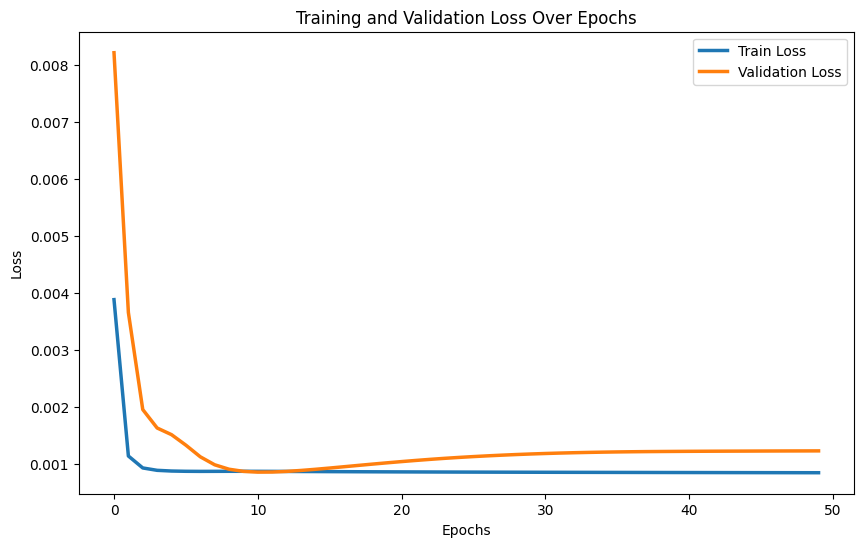

In [22]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', linewidth=2.5)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [23]:
test_X.shape


(8760, 1, 8)

In [24]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(8760, 1)
(8760,)


In [25]:
test.shape

(8760, 9)

In [26]:
print(test), print(test.shape)

[[0.02313883 0.29411766 0.42622948 ... 0.         0.6666666  0.02414487]
 [0.02414487 0.29411766 0.42622948 ... 0.         0.6666666  0.05331992]
 [0.05331992 0.29411766 0.42622948 ... 0.         0.6666666  0.06539235]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.         0.6666666  0.01006036]
 [0.01006036 0.2647059  0.26229507 ... 0.         0.6666666  0.00804829]
 [0.00804829 0.2647059  0.24590163 ... 0.         0.6666666  0.01207243]]
(8760, 9)


(None, None)

In [27]:
y_test_true = test[:,8]

In [28]:
pollution_original = np.array(df["pollution"])

meanop = pollution_original.mean()
stdop = pollution_original.std()

y_test_true = y_test_true*stdop + meanop
testPredict = testPredict*stdop + meanop

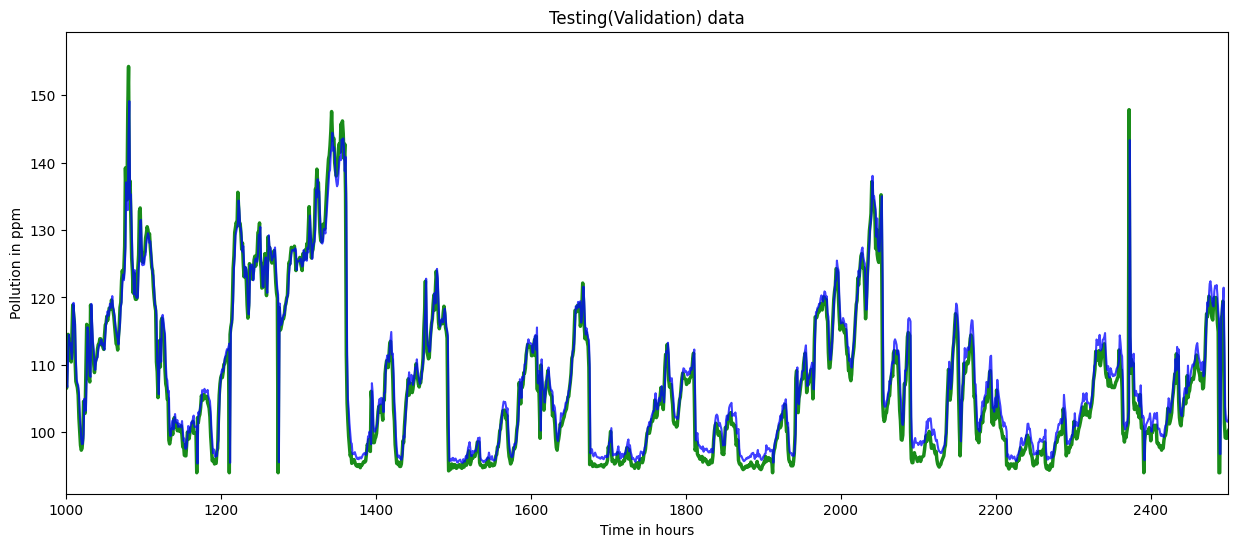

In [31]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([1000,2500])
plt.ylabel("Pollution in ppm")
plt.xlabel("Time in hours")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict, c = "b", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict))
print("Test(Validation) RMSE ="  ,rmse)

# As shown, the RMSE for testing data is low, and visually as well, from the above plots, we can see that the basic model is able to
# predict the future values of pollution (in ppm) pretty well

Test(Validation) RMSE = 3.2141218


<h2> Second LSTM Model try with more parameters etc.

In [26]:
# Function to create and compile the model
def create_model2(input_shape, lstm_units=256, dense_units_1=64, dense_units_2=1, dropout_rate=0.25, learning_rate=0.001):
    model = Sequential()
    
    # Add LSTM layer
    model.add(LSTM(lstm_units, input_shape=input_shape))
    
    # Add first Dense layer
    model.add(Dense(dense_units_1))
    
    # Add Dropout layer
    model.add(Dropout(dropout_rate))
    
    # Add BatchNormalization layer
    model.add(BatchNormalization())
    
    # Add second Dense layer
    model.add(Dense(dense_units_2))
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, 
                  metrics=[MeanAbsoluteError(), RootMeanSquaredError()])
    
    return model


def train_model(model, train_X, train_y, epochs=50, batch_size=128, validation_data=None, shuffle=False):
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size,
                        validation_data=validation_data, verbose=2, shuffle=shuffle)
    return history

# Hyperparameters
input_shape = (train_X.shape[1], train_X.shape[2])
lstm_units = 256
dense_units_1 = 64
dense_units_2 = 1
dropout_rate = 0.25
learning_rate = 0.001
epochs=50
batch_size=128

# Create the model
model_manual = create_model2(input_shape, lstm_units, dense_units_1, dense_units_2, dropout_rate, learning_rate)
model_manual.summary()

# Train the model using the train_model function
hist_manual = train_model(model_manual, train_X, train_y, epochs, batch_size, validation_data=(test_X, test_y))


c:\DHBW\Semester 6\Machine Learning Project\mlp_venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       271,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,129 (1.10 MB)

 Trainable params: 288,001 (1.10 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
274/274 - 3s - 12ms/step - loss: 0.0094 - mean_absolute_error: 0.0657 - root_mean_squared_error: 0.0971 - val_loss: 0.0071 - val_mean_absolute_error: 0.0631 - val_root_mean_squared_error: 0.0840
Epoch 2/50
274/274 - 1s - 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0483 - root_mean_squared_error: 0.0659 - val_loss: 0.0032 - val_mean_absolute_error: 0.0414 - val_root_mean_squared_error: 0.0565
Epoch 3/50
274/274 - 1s - 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0467 - root_mean_squared_error: 0.0638 - val_loss: 9.0193e-04 - val_mean_absolute_error: 0.0193 - val_root_mean_squared_error: 0.0300
Epoch 4/50
274/274 - 1s - 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0454 - root_mean_squared_error: 0.0623 - val_loss: 0.0022 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0464
Epoch 5/50
274/274 - 1s - 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0450 - root_mean_squared_error: 0.0618 - val_loss: 0.0023 - val_mean_absolute_error: 0.0408 - val_ro

<h3> Hyperparametertuning (Batch Size) mit MLFlow

In [ ]:
import mlflow
import mlflow.keras

# Set the tracking URI to the local MLflow server
mlflow.set_tracking_uri("http://localhost:5000")

# Define a name for the series of experiments
experiment_name = "Bach_Size Hyperparametertuning Neu"

# Set the experiment name
mlflow.set_experiment(experiment_name)

# Funktion zum Trainieren und Protokollieren des Modells mit MLFlow
def train_and_log_model(lstm_units, input_shape, dense_units_1, dense_units_2, dropout_rate, learning_rate, epochs, batch_size):
    params = {
        'lstm_units': lstm_units,
        'dense_units_1': dense_units_1,
        'dense_units_2': dense_units_2,
        'dropout_rate': dropout_rate,
        'learning_rate': learning_rate
    }
    
    model_new = create_model2(input_shape, **params)
    
    with mlflow.start_run():
         # Log parameters
        mlflow.log_params(params)
        mlflow.log_param('batch_size', batch_size)
        history_new = model_new.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2)
        
        # Manual RMSE calculation on the original scale
        testPredict2 = model_new.predict(test_X).ravel()
        poll = np.array(df["pollution"])
        meanop = poll.mean()
        stdop = poll.std()
        
        y_test_true = test_y * stdop + meanop
        testPredict2 = testPredict2 * stdop + meanop
        
        rmse = np.sqrt(mean_squared_error(y_test_true, testPredict2))
        mae = mean_absolute_error(y_test_true, testPredict2)
        loss = mean_squared_error(y_test_true, testPredict2)  # Equivalent to manually calculating MSE loss

        mlflow.log_metrics({
            'val_loss': loss,
            'val_mae': mae,
            'val_rmse': rmse
        })
        mlflow.keras.log_model(model_new, "model")

# Hyperparameter-Tuning mit einer Schleife für lstm_units
for batch_size in [1, 2, 4, 8, 16, 32, 64, 100, 128, 150, 200, 256]:
    train_and_log_model(lstm_units, input_shape, dense_units_1, dense_units_2, dropout_rate, learning_rate, epochs, batch_size)

In [3]:
!mlflow ui

31.27121373918745
14.5838679252488


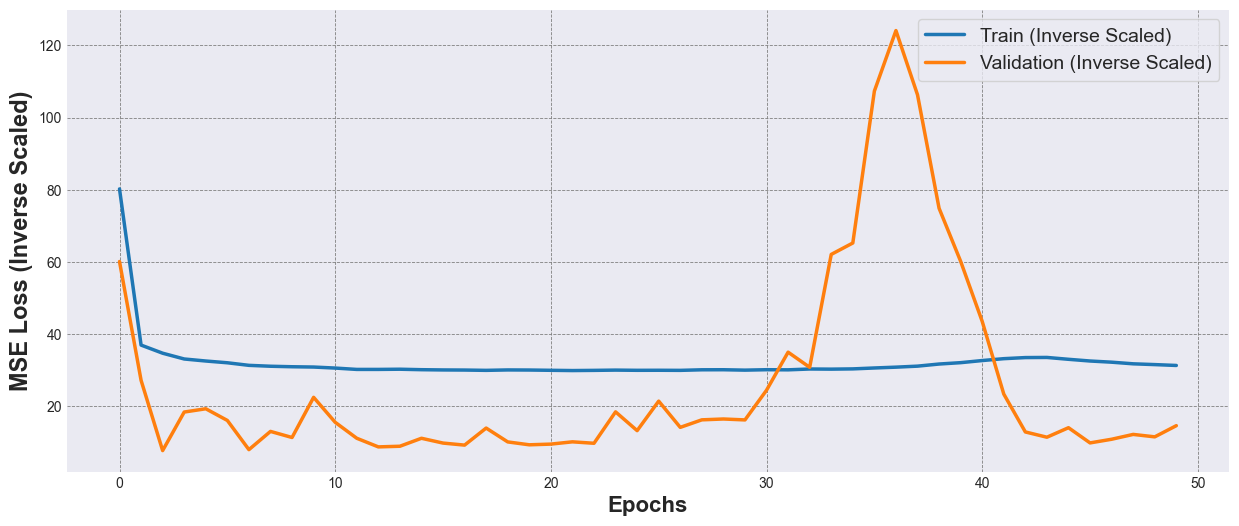

In [27]:
#TEST für inversierte SKALA und plot


# Beispielhafte Daten für den Skalar und Mittelwert der Originaldaten
poll = np.array(df["pollution"])
meanop = poll.mean()
stdop = poll.std()

# Helper function to inverse scale the loss
def inverse_scale_mse(mse, std):
    return mse * (std ** 2)

# Inverse scale the MSE losses for both training and validation
train_losses_inverse_scaled = [inverse_scale_mse(loss, stdop) for loss in hist_manual.history['loss']]
val_losses_inverse_scaled = [inverse_scale_mse(loss, stdop) for loss in hist_manual.history['val_loss']]
print(train_losses_inverse_scaled[49])
print(val_losses_inverse_scaled[49])

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(train_losses_inverse_scaled, label='Train (Inverse Scaled)', linewidth=2.5)
plt.plot(val_losses_inverse_scaled, label='Validation (Inverse Scaled)', linewidth=2.5)
plt.xlabel('Epochs', fontsize=16, fontweight='bold')
plt.ylabel('MSE Loss (Inverse Scaled)', fontsize=17, fontweight='bold')
plt.legend(fontsize=14, frameon=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')
plt.show()

In [28]:
test.shape

(8760, 9)

In [29]:
print(test), print(test.shape)

[[0.02313883 0.29411766 0.42622948 ... 0.         0.6666666  0.02414487]
 [0.02414487 0.29411766 0.42622948 ... 0.         0.6666666  0.05331992]
 [0.05331992 0.29411766 0.42622948 ... 0.         0.6666666  0.06539235]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.         0.6666666  0.01006036]
 [0.01006036 0.2647059  0.26229507 ... 0.         0.6666666  0.00804829]
 [0.00804829 0.2647059  0.24590163 ... 0.         0.6666666  0.01207243]]
(8760, 9)


(None, None)

In [30]:
y_test_true = test[:,8]

In [31]:
testPredict2 = model_manual.predict(test_X)
testPredict2 = testPredict2.ravel()

# Inverse scaling the output, for better visual interpretation 

poll = np.array(df["pollution"])
meanop = poll.mean()
stdop = poll.std()

print(meanop, stdop)

y_test_true = y_test_true*stdop + meanop
testPredict2 = testPredict2*stdop + meanop

# Berechnung der Standardabweichung der Differenz
diff = y_test_true - testPredict2
std_diff = np.std(diff)

print("Standardabweichung der Differenz:", std_diff)

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94.01351598173515 92.25122315439845
Standardabweichung der Differenz: 3.22416


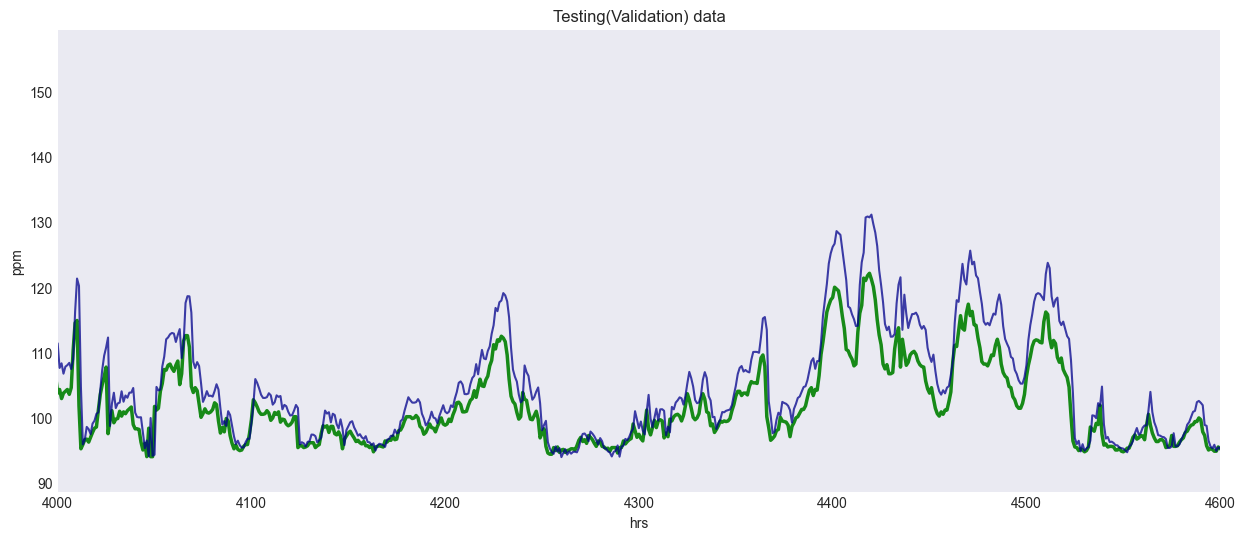

In [77]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.xlim([4000,4600])
plt.ylabel("ppm")
plt.xlabel("hrs")
plt.plot(y_test_true, c = "g", alpha = 0.90, linewidth = 2.5)
plt.plot(testPredict2, c = "darkblue", alpha = 0.75)
plt.title("Testing(Validation) data")
plt.show()

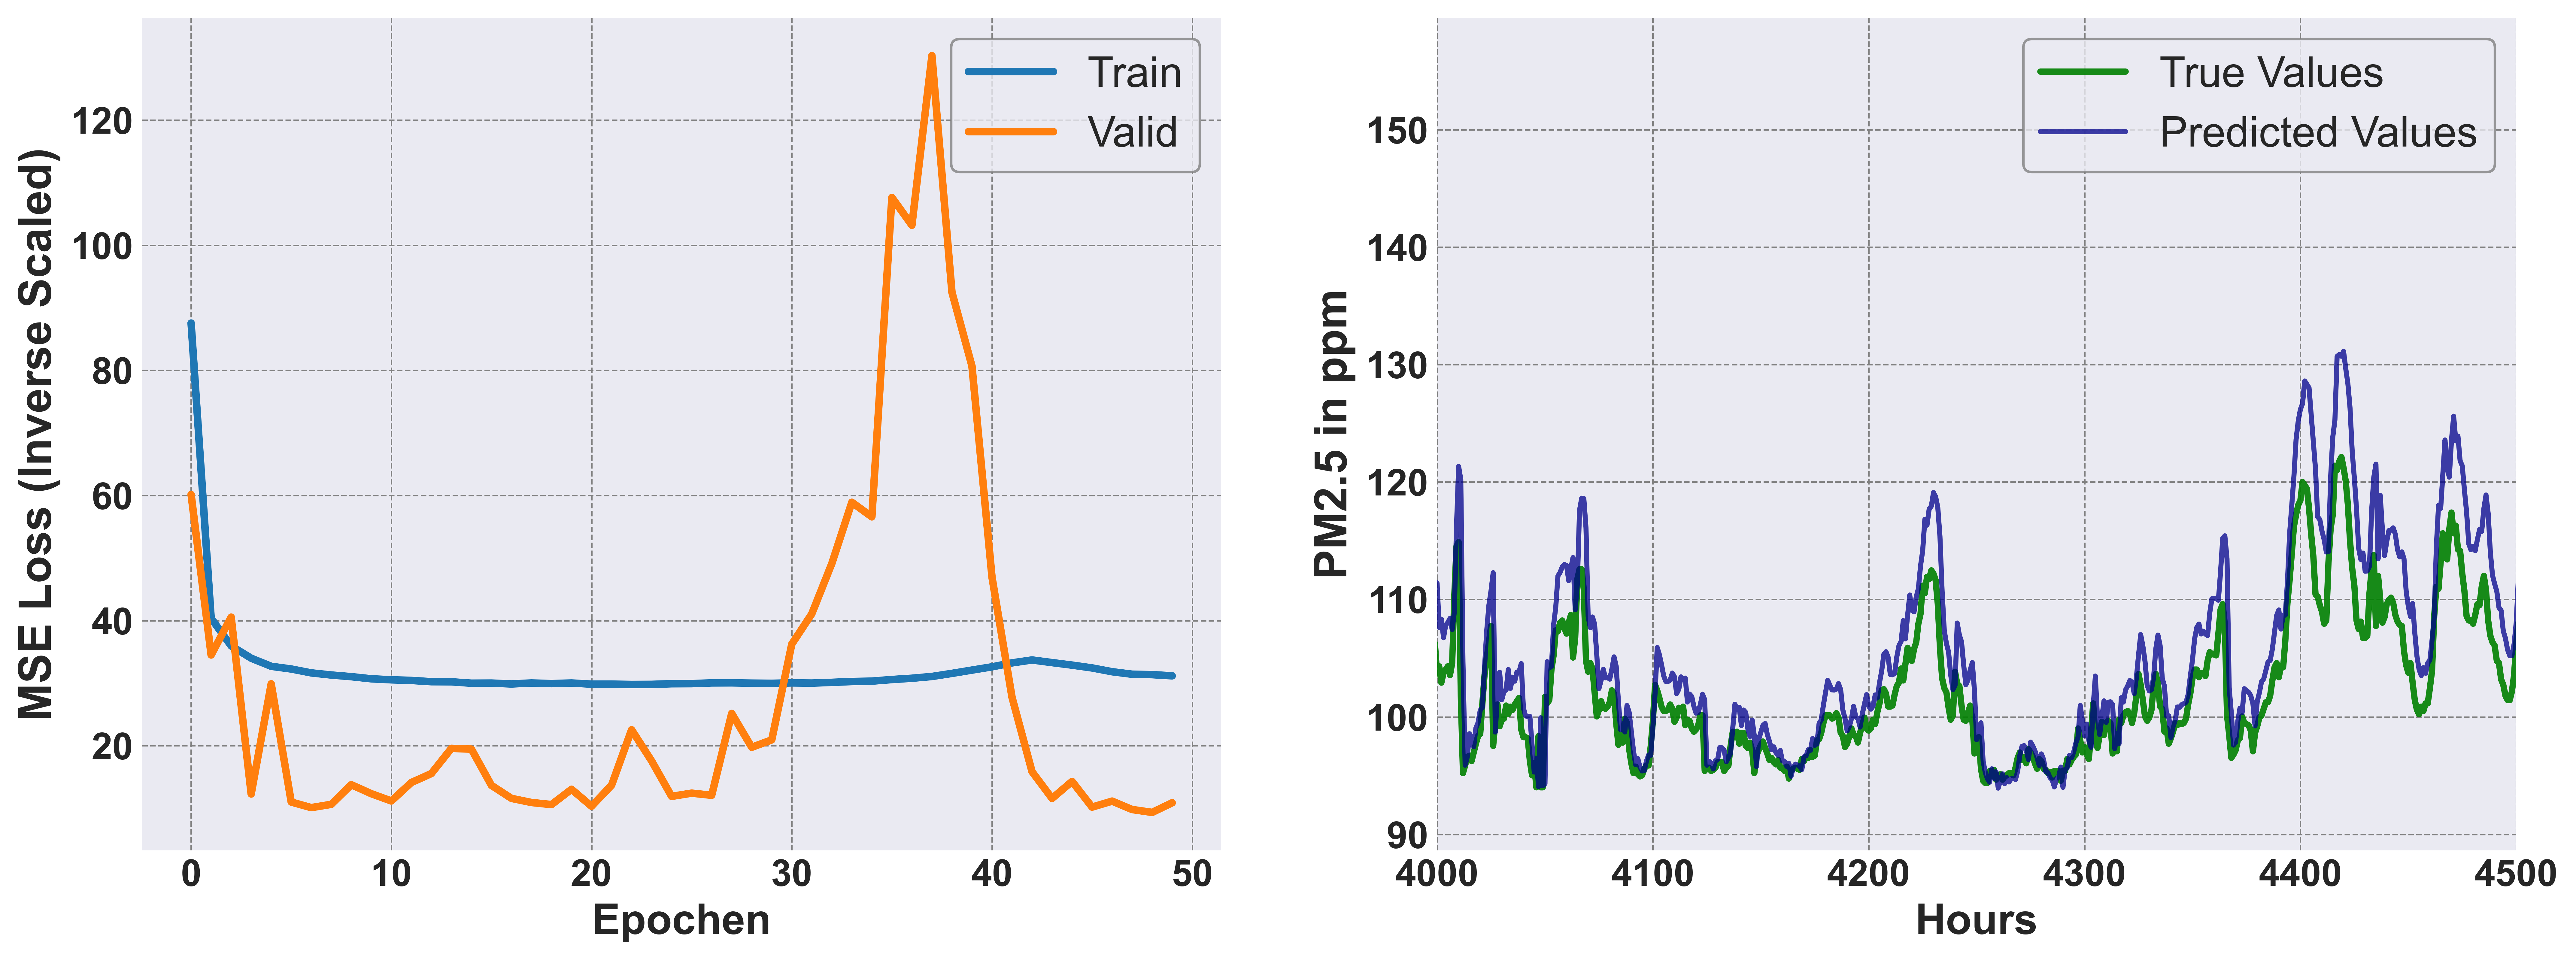

In [86]:
#Visualisierung für REPORT 1 (Ergebnisse Vor Hyperparametertuning)

import numpy as np
import matplotlib.pyplot as plt

# Use an available style
plt.style.use('seaborn-v0_8-dark')

# Create subplot layout
fig, axs = plt.subplots(1, 2, figsize=(17, 6), dpi=600)

# Plot from Code 2 on the first subplot
axs[0].plot(train_losses_inverse_scaled, label='Train', linewidth=3)
axs[0].plot(val_losses_inverse_scaled, label='Valid', linewidth=3)
axs[0].set_xlabel('Epochen', fontsize=17, fontweight='bold')
axs[0].set_ylabel('MSE Loss (Inverse Scaled)', fontsize=18, fontweight='bold')
legend_0 = axs[0].legend(fontsize=17, frameon=True)
legend_0.get_frame().set_edgecolor('gray')
legend_0.get_frame().set_linewidth(1.0)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')

# Plot from Code 3 on the second subplot
axs[1].plot(y_test_true, c='g', alpha=0.90, linewidth=2.5, label='True Values')
axs[1].plot(testPredict2, c='darkblue', alpha=0.75, linewidth=2, label='Predicted Values')
axs[1].set_xlim([4000, 4500])
axs[1].set_xlabel('Hours', fontsize=17, fontweight='bold')
axs[1].set_ylabel('PM2.5 in ppm', fontsize=18, fontweight='bold')
legend_1 = axs[1].legend(fontsize=17, frameon=True)
legend_1.get_frame().set_edgecolor('gray')
legend_1.get_frame().set_linewidth(1.0)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')

# Adjust font size and weight for tick labels
for ax in axs:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(15)

# Save the figure
plt.savefig('combined_plot.png')

plt.show()


In [79]:
rmse = np.sqrt(mean_squared_error(y_test_true, testPredict2))
print("Test(Validation) RMSE ="  ,rmse)

Test(Validation) RMSE = 3.2985482


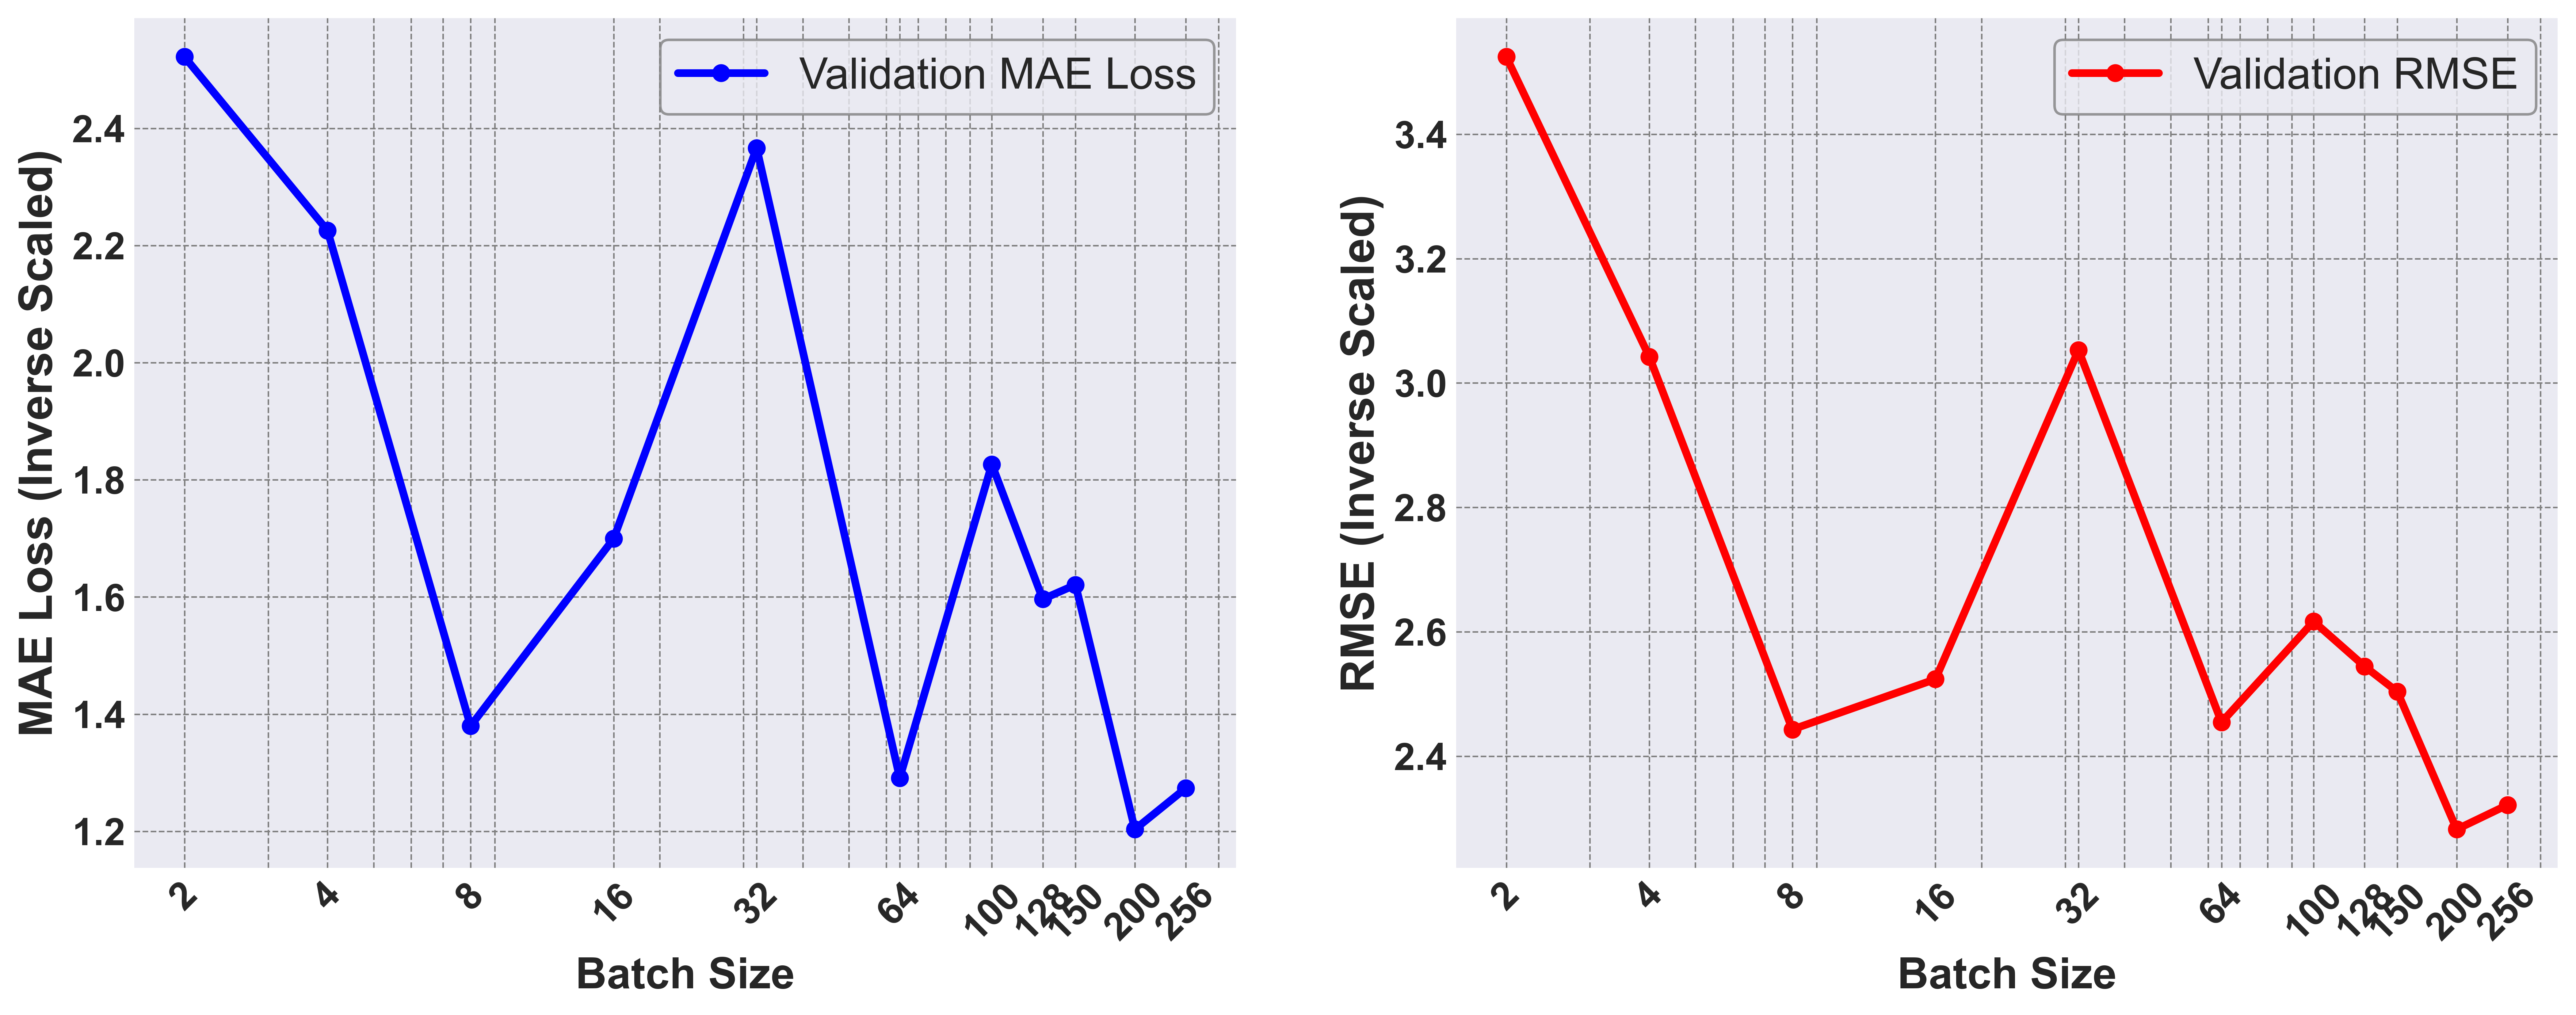

In [5]:
#Visualisierung nach Hyperparametertuning
from matplotlib.ticker import ScalarFormatter, FixedLocator

# Load the data from the CSV file
data = pd.read_csv('mlflow_batch_size_runs.csv')

# Extract relevant columns
batch_size = data['batch_size']
val_loss = data['val_mae']
val_rmse = data['val_rmse']

# Use an available style
plt.style.use('seaborn-v0_8-dark')

# Create subplot layout
fig, axs = plt.subplots(1, 2, figsize=(17, 6), dpi=600)

# Plot val_loss on the first subplot
axs[0].plot(batch_size, val_loss, 'bo-', linewidth=3, label='Validation MAE Loss')
axs[0].set_xlabel('Batch Size', fontsize=17, fontweight='bold')
axs[0].set_ylabel('MAE Loss (Inverse Scaled)', fontsize=18, fontweight='bold')
axs[0].set_xscale('log')
axs[0].set_xticks(batch_size)
axs[0].get_xaxis().set_major_formatter(ScalarFormatter())
axs[0].get_xaxis().set_minor_formatter(plt.NullFormatter())
axs[0].xaxis.set_major_locator(FixedLocator(batch_size))
axs[0].tick_params(axis='x', which='major', labelsize=15)
axs[0].tick_params(axis='x', which='minor', bottom=False)  # Remove minor ticks
axs[0].set_xticklabels(batch_size, rotation=45)  # Rotate labels for better readability
legend_0 = axs[0].legend(fontsize=17, frameon=True)
legend_0.get_frame().set_edgecolor('gray')
legend_0.get_frame().set_linewidth(1.0)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')

# Plot val_rmse on the second subplot
axs[1].plot(batch_size, val_rmse, 'ro-', linewidth=3, label='Validation RMSE')
axs[1].set_xlabel('Batch Size', fontsize=17, fontweight='bold')
axs[1].set_ylabel('RMSE (Inverse Scaled)', fontsize=18, fontweight='bold')
axs[1].set_xscale('log')
axs[1].set_xticks(batch_size)
axs[1].get_xaxis().set_major_formatter(ScalarFormatter())
axs[1].get_xaxis().set_minor_formatter(plt.NullFormatter())
axs[1].xaxis.set_major_locator(FixedLocator(batch_size))
axs[1].tick_params(axis='x', which='major', labelsize=15)
axs[1].tick_params(axis='x', which='minor', bottom=False)  # Remove minor ticks
axs[1].set_xticklabels(batch_size, rotation=45)  # Rotate labels for better readability
legend_1 = axs[1].legend(fontsize=17, frameon=True)
legend_1.get_frame().set_edgecolor('gray')
legend_1.get_frame().set_linewidth(1.0)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.6, color='gray')

# Adjust font size and weight for tick labels
for ax in axs:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(15)

# Save the figure
plt.savefig('hyperparameter_tuning_plot.png')

plt.show()